In [23]:
import cv2

# 读取为BGR格式
img = cv2.imread("resource/image/cat.png")
# 图像显示
cv2.imshow('cat', img)
# 等待时间，0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
def show_img(name: str, image):
    cv2.imshow(name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [25]:
img.shape

(378, 474, 3)

In [26]:
# cv2.IMREAD_GRAYSCALE : 灰度图像
# cv2.IMREAD_COLOR : 彩色图像
img_gray = cv2.imread("resource/image/cat.png", cv2.IMREAD_GRAYSCALE)
show_img("Gray", img_gray)

In [27]:
img_gray.shape

(378, 474)

In [28]:
# 保存
cv2.imwrite("resource/image/cat_gray.png", img_gray)

True

In [29]:
video = cv2.VideoCapture("resource/video/test_video.mp4")

# 检查是否能打开
if video.isOpened():
    is_open, frame = video.read()
else:
    is_open = False

In [30]:
while is_open:
    return_value, frame = video.read()
    if frame is None:
        break
    if return_value:
        video_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        show_img(" result", video_gray)

video.release()
cv2.destroyAllWindows()

In [31]:
# 截取部分图像
cat = img[0:200, 0:200]
show_img('cat part', cat)

In [34]:
# 颜色通道提取
b, g, r = cv2.split(img)
b.shape

(378, 474)

In [35]:
# 颜色通道合并
img = cv2.merge((b, g, r))
img.shape

(378, 474, 3)

In [36]:
# 只保留 R
tmp_img = img.copy()
tmp_img[:, :, 0] = 0
tmp_img[:, :, 1] = 0
show_img("R", tmp_img)

In [37]:
# 只保留 G
tmp_img = img.copy()
tmp_img[:, :, 0] = 0
tmp_img[:, :, 2] = 0
show_img("G", tmp_img)

In [38]:
# 只保留 B
tmp_img = img.copy()
tmp_img[:, :, 1] = 0
tmp_img[:, :, 2] = 0
show_img("B", tmp_img)

# 边界填充
cv2.copyMakeBorder 用于在图像周围创建一个边框

该函数的语法如下：

`cv2.copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]])`

其中，参数解释如下：

1. src：输入图像
2. top、bottom、left、right：分别表示在输入图像的上、下、左、右四个方向上边框大小
3. borderType：指定边框类型
    1. cv2.BORDER_REPLICATE : 复制边缘像素的值，会在原图像外围复制一圈像素。
    2. cv2.BORDER_REFLECT : 是将原图像边缘像素的值作为轴心进行镜像反转, dcba|abcd|dcba
    3. cv2.BORDER_REFLECT_101 : 会在原图像外围复制一圈像素, 这种方式可以避免边界像素出现重复,  edcb|abcde|dcba
    4. cv2.BORDER_WRAP : 在边缘像素处使用原图像的反转版本来填充像素值, bcde|abcde|abcd
    5. cv2.BORDER_CONSTANT : 恒定边框, 常数值

In [40]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

case_1 = cv2.copyMakeBorder(img,
                            top_size, bottom_size, left_size, right_size,
                            borderType=cv2.BORDER_REPLICATE)

case_2 = cv2.copyMakeBorder(img,
                            top_size, bottom_size, left_size, right_size,
                            borderType=cv2.BORDER_REFLECT)

case_3 = cv2.copyMakeBorder(img,
                            top_size, bottom_size, left_size, right_size,
                            borderType=cv2.BORDER_REFLECT_101)

case_4 = cv2.copyMakeBorder(img,
                            top_size, bottom_size, left_size, right_size,
                            borderType=cv2.BORDER_WRAP)

case_5 = cv2.copyMakeBorder(img,
                            top_size, bottom_size, left_size, right_size,
                            borderType=cv2.BORDER_CONSTANT, value=0)

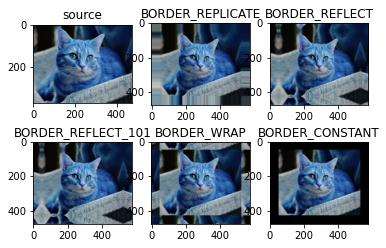

In [41]:
import matplotlib.pyplot as plt

plt.subplot(231), plt.imshow(img, 'gray'), plt.title('source')
plt.subplot(232), plt.imshow(case_1, 'gray'), plt.title('BORDER_REPLICATE')
plt.subplot(233), plt.imshow(case_2, 'gray'), plt.title('BORDER_REFLECT')
plt.subplot(234), plt.imshow(case_3, 'gray'), plt.title('BORDER_REFLECT_101')
plt.subplot(235), plt.imshow(case_4, 'gray'), plt.title('BORDER_WRAP')
plt.subplot(236), plt.imshow(case_5, 'gray'), plt.title('BORDER_CONSTANT')

plt.show()